### 라이브러리 불러오기 및 설정

In [ ]:
# 공통 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pathlib import Path
from tqdm import tqdm

In [ ]:
color = sns.color_palette()

pd.options.mode.chained_assignment = None

### 데이터

#### 데이터 설명

- orders : 주문정보
- produscts : 제품정보
- departments : 제품 카테고리
- aisles_df : 제품 상세카테고리
- order products prior : 과거 구매자군의 제품주문내역
- order products train : 현재 구매자군의 제품주문내역

#### 데이터 불러오기

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE_PATH = '/content/drive/MyDrive/데이터/CP1/DA/Instacart Market Basket Analysis/'

In [ ]:
# # matplotlib 한글 폰트 깨짐 방지
# from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname = BASE_PATH + "BMJUA_ttf.ttf").get_name()
# rc('font', family=font_name)
# font_manager._rebuild()

In [ ]:
aisle_origin = pd.read_csv(BASE_PATH + 'aisles.csv')
dep_origin = pd.read_csv(BASE_PATH + 'departments.csv')
prod_pri_origin = pd.read_csv(BASE_PATH + 'order_products__prior.csv')
prod_tra_origin = pd.read_csv(BASE_PATH + 'order_products__train.csv')
orders_origin = pd.read_csv(BASE_PATH + 'orders.csv')
prod_origin = pd.read_csv(BASE_PATH + 'products.csv')

In [ ]:
aisle_df = aisle_origin.copy()
dep_df = dep_origin.copy()
prod_pri_df = prod_pri_origin.copy()
prod_tra_df = prod_tra_origin.copy()
orders_df = orders_origin.copy()
prod_df = prod_origin.copy()

In [ ]:
orders_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


#### 전처리

In [ ]:
frames = [prod_pri_df, prod_tra_df]
order_products_df = pd.concat(frames, ignore_index=True)
print(order_products_df.shape)
order_products_df

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
33819101,3421063,14233,3,1
33819102,3421063,35548,4,1
33819103,3421070,35951,1,1
33819104,3421070,16953,2,1


### EDA 및 분석

1. 사람들은 언제 주문을 할까? 
  - 하루 중
  - 일주일 중
  - 요일별/시간대별 구매 추이

2. 얼마나 많은 항목을 샀을까?

3. 가장 많이 주문한 것은 무엇일까?
  - 카테고리
  - 제품

4. 언제 재주문을 할까?

5. 얼마나 재주문을 했을까?

6. 얼마나 자주 같은 제품을 주문했을까?
  - 그 중 어떤 카테고리가 재구매율이 높을까?
  - 그 중 어떤 제품이 재구매율이 높을까?
  - 시간대별 재주문 추이
  - 요일별 재주문 추이
  - 요일별/시간대별 재주문 추이

7. 장바구니 추가와 재주문율 관계
  - 그 중 어떤 제품을 제일 처음 장바구니에 넣을까?

8. 연관성
  - 마지막 주문 날짜와 재주문
  - 주문 수와 재주문

9. VS
  - Organic vs Non-organic
  - Reordering Organic vs Non-organic

10. 카테고리별로 각각 어떻게 구성되어 있을까?
  - 양도 나타낸다.

#### 1. 사람들은 언제 주문을 할까?

태블로

#### 2. 얼마나 많은 항목을 샀을까?

In [ ]:
add_max = order_products_df.groupby('order_id')['add_to_cart_order'].max().reset_index()
count_max = add_max['add_to_cart_order'].value_counts()
count_max

5      237225
6      236383
4      230299
7      228547
3      215060
        ...  
105         1
114         1
121         1
90          1
115         1
Name: add_to_cart_order, Length: 113, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


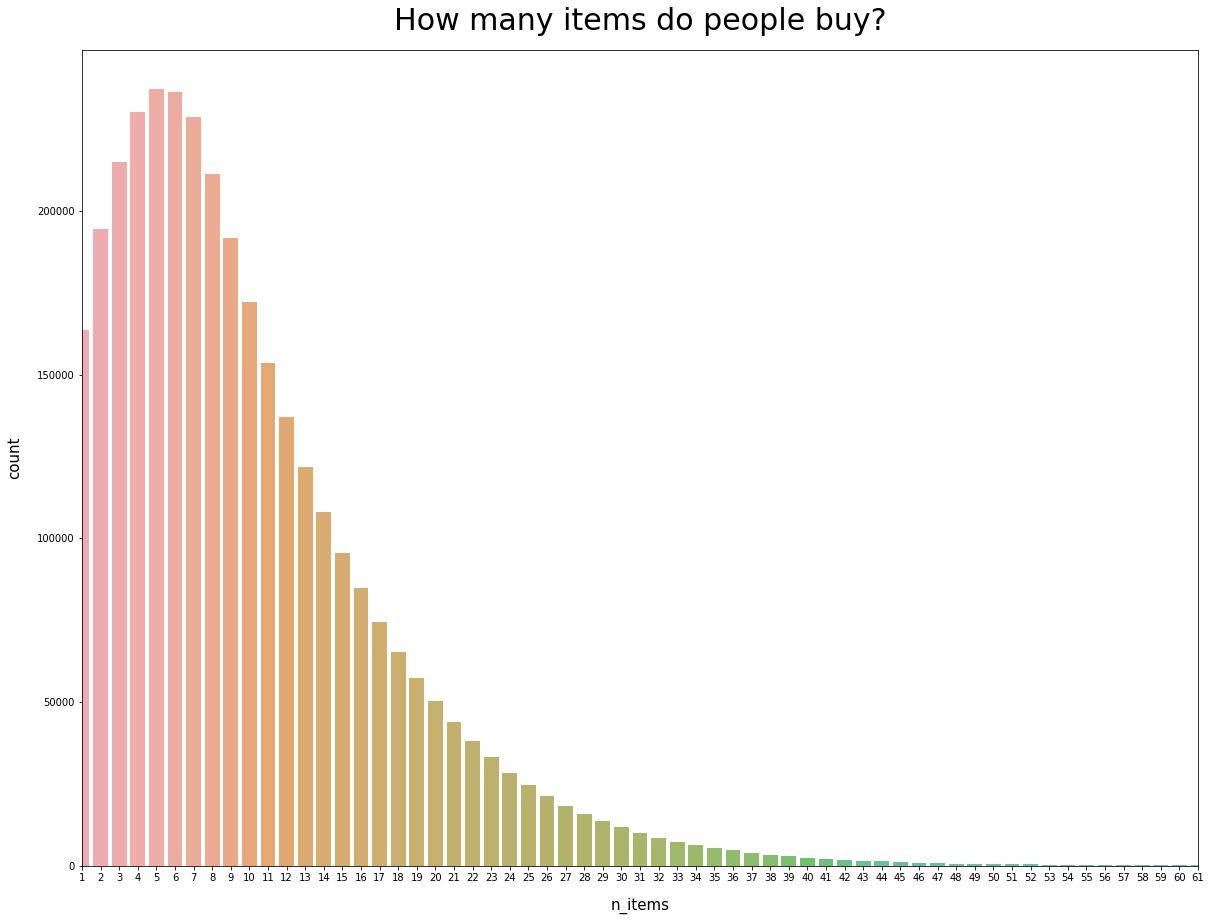

In [ ]:
plt.figure(figsize=(20, 15))
plt.title('How many items do people buy?', fontsize=30, pad=20)
sns.barplot(count_max.index, count_max.values, alpha=0.8)
plt.xlabel('n_items', fontsize = 15, labelpad=15)
plt.ylabel('count', fontsize = 15, labelpad=15)
plt.xlim([0, 60])
plt.show();

#### 3. 가장 많이 주문한 것은 무엇일까?

태블로

#### 4. 언제 재주문을 할까?

태블로

#### 5. 얼마나 재주문을 했을까?

태블로

#### 6. 얼마나 자주 같은 제품을 주문했을까?

##### 6-0.

In [ ]:
count_re = order_products_df.groupby('reordered').count().reset_index()
count_re['proportation'] = count_re['order_id'] / sum(count_re['order_id'])
count_re

,reordered,order_id,product_id,add_to_cart_order,proportation
0,0,13863746,13863746,13863746,0.409938
1,1,19955360,19955360,19955360,0.590062


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


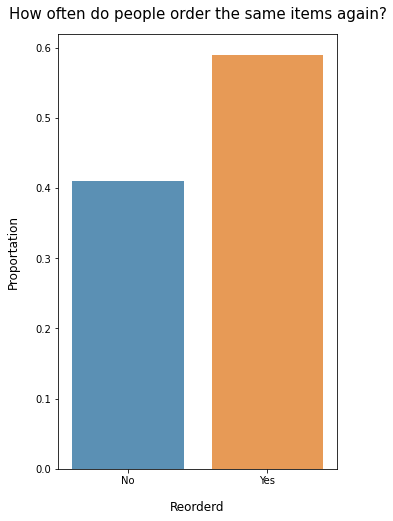

In [ ]:
plt.figure(figsize=(5,8))
plt.title('How often do people order the same items again?', fontsize=15, pad=15)
sns.barplot(count_re['reordered'], count_re['proportation'], alpha=0.8)
plt.xlabel('Reorderd', fontsize = 12, labelpad=15)
plt.ylabel('Proportation', fontsize = 12, labelpad=15)
plt.xticks([0, 1], labels=['No', 'Yes'])
plt.show();

##### 6-1. 그 중 어떤 카테고리가 재구매율이 높을까?

In [ ]:
cate_filter = order_products_df.copy().drop(columns=['add_to_cart_order'])

In [ ]:
cate_filter = cate_filter.join(prod_df[['product_id', 'department_id']].set_index('product_id'), on='product_id')
cate_filter = cate_filter.groupby('department_id')['reordered'].mean().reset_index()
cate_filter = cate_filter.join(dep_df.set_index('department_id'), on='department_id')
cate_filter

,department_id,reordered,department
0,1,0.542634,frozen
1,2,0.407052,other
2,3,0.628381,bakery
3,4,0.650521,produce
4,5,0.571221,alcohol
5,6,0.369682,international
6,7,0.653651,beverages
7,8,0.602557,pets
8,9,0.462220,dry goods pasta
9,10,0.577090,bulk


In [ ]:
reordered_top10_dep = cate_filter.sort_values('reordered', ascending=False).head(10)
reordered_top10_dep

,department_id,reordered,department
15,16,0.670161,dairy eggs
6,7,0.653651,beverages
3,4,0.650521,produce
2,3,0.628381,bakery
19,20,0.608130,deli
7,8,0.602557,pets
17,18,0.577680,babies
9,10,0.577090,bulk
18,19,0.574464,snacks
4,5,0.571221,alcohol


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


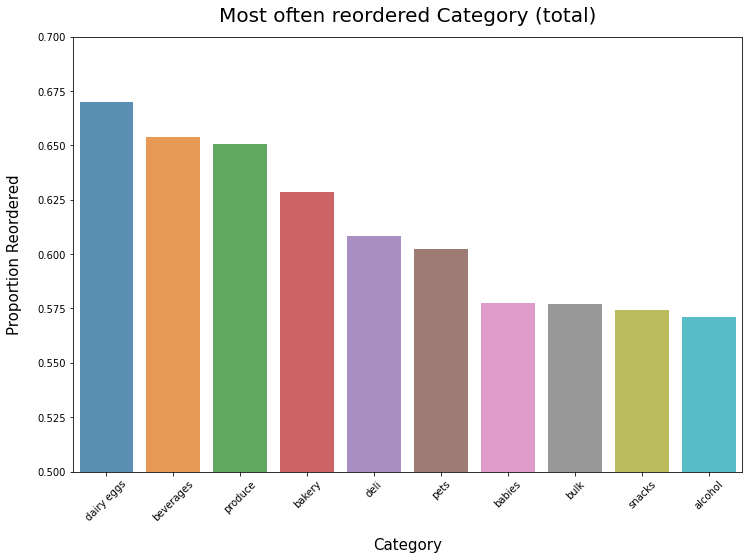

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Most often reordered Category (total)', fontsize=20, pad=15)
sns.barplot(reordered_top10_dep['department'], reordered_top10_dep['reordered'], alpha=0.8)
plt.xlabel('Category', fontsize = 15, labelpad=15)
plt.ylabel('Proportion Reordered', fontsize = 15, labelpad=15)
plt.xticks(rotation=45)
plt.ylim([0.5, 0.70])
plt.show();

##### 6-2. 그 중 어떤 제품이 재구매율이 높을까?

In [ ]:
total_filter = order_products_df.groupby('product_id').count().reset_index()
total_filter_df = total_filter.query('order_id>40').reset_index(drop=True)
total_filter_df

,product_id,order_id,add_to_cart_order,reordered
0,1,1928,1928,1928
1,2,94,94,94
2,3,283,283,283
3,4,351,351,351
4,8,178,178,178
...,...,...,...,...
29168,49682,113,113,113
29169,49683,99728,99728,99728
29170,49685,49,49,49
29171,49686,127,127,127


In [ ]:
total_often_df = order_products_df[order_products_df['product_id'].isin(total_filter_df['product_id'])]
total_often_df

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
33819101,3421063,14233,3,1
33819102,3421063,35548,4,1
33819103,3421070,35951,1,1
33819104,3421070,16953,2,1


In [ ]:
reordered_df = total_often_df.groupby('product_id')['reordered'].mean().reset_index().sort_values('reordered', ascending=False).reset_index(drop=True)
reordered_prod_df = reordered_df.join(prod_df[['product_id', 'product_name']].set_index('product_id'), on='product_id')
reordered_top10_prod = reordered_prod_df.head(10)
reordered_top10_prod

,product_id,reordered,product_name
0,6433,0.942029,Raw Veggie Wrappers
1,2075,0.933333,Serenity Ultimate Extrema Overnight Pads
2,27740,0.921569,Chocolate Love Bar
3,13875,0.911111,Simply Sleep Nighttime Sleep Aid
4,36543,0.898551,Bars Peanut Butter
5,26093,0.895522,Soy Crisps Lightly Salted
6,35604,0.894231,Maca Buttercups
7,38251,0.891892,Benchbreak Chardonnay
8,36801,0.888889,Organic Blueberry B Mega
9,31418,0.887097,Sparking Water


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


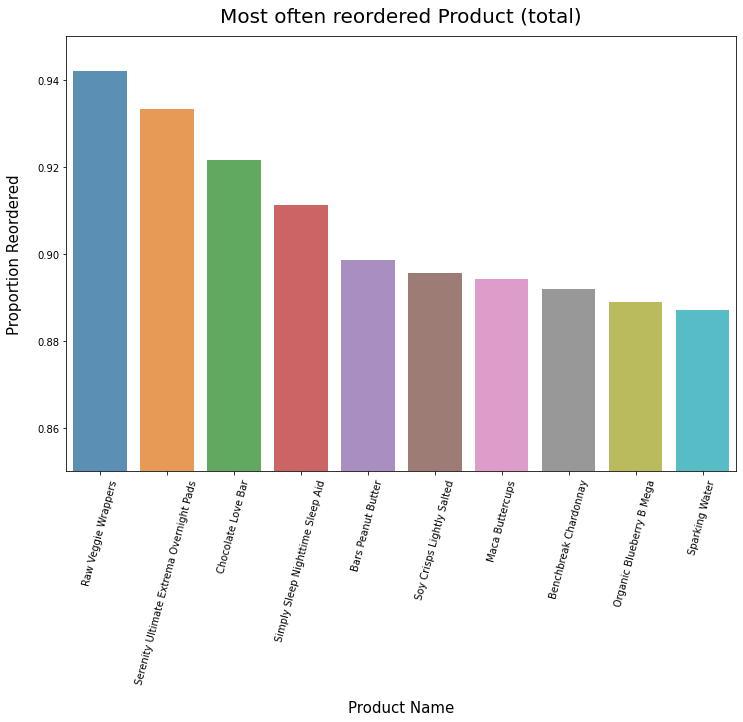

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Most often reordered Product (total)', fontsize=20, pad=15)
sns.barplot(reordered_top10_prod['product_name'], reordered_top10_prod['reordered'], alpha=0.8)
plt.xlabel('Product Name', fontsize = 15, labelpad=15)
plt.ylabel('Proportion Reordered', fontsize = 15, labelpad=15)
plt.xticks(rotation=75)
plt.ylim([0.85, 0.95])
plt.show();

##### 6-3. 시간대별 재주문 추이

In [ ]:
total_order = order_products_df.join(orders_df.set_index('order_id'), on='order_id')
total_order

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...
33819101,3421063,14233,3,1,169679,train,30,0,10,4.0
33819102,3421063,35548,4,1,169679,train,30,0,10,4.0
33819103,3421070,35951,1,1,139822,train,15,6,10,8.0
33819104,3421070,16953,2,1,139822,train,15,6,10,8.0


In [ ]:
of_day_reorderd = total_order.groupby('order_hour_of_day')['reordered'].mean().reset_index().sort_values('reordered', ascending=False).reset_index(drop=True)
of_day_reorderd.head()

,order_hour_of_day,reordered
0,7,0.644669
1,6,0.637050
2,8,0.632315
3,9,0.619589
4,5,0.608569


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


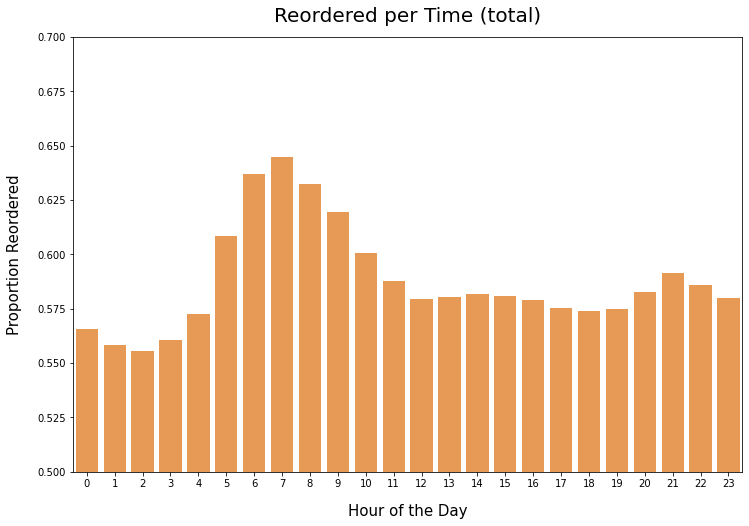

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Reordered per Time (total)', fontsize=20, pad=15)
sns.barplot(of_day_reorderd['order_hour_of_day'], of_day_reorderd['reordered'], alpha=0.8, color=color[1])
plt.xlabel('Hour of the Day', fontsize = 15, labelpad=15)
plt.ylabel('Proportion Reordered', fontsize = 15, labelpad=15)
plt.ylim([0.5, 0.7])
plt.show();

##### 6-4. 요일별 재주문 추이

In [ ]:
of_week_reorderd = total_order.groupby('order_dow')['reordered'].mean().reset_index().sort_values('reordered', ascending=False).reset_index(drop=True)
of_week_reorderd.head()

,order_dow,reordered
0,1,0.603672
1,5,0.595902
2,4,0.591123
3,2,0.589720
4,0,0.586483


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


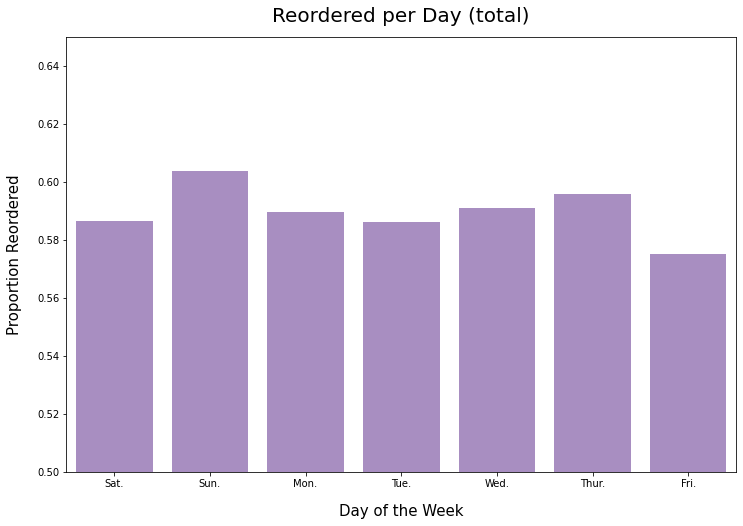

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Reordered per Day (total)', fontsize=20, pad=15)
sns.barplot(of_week_reorderd['order_dow'], of_week_reorderd['reordered'], alpha=0.8, color=color[4])
plt.xlabel('Day of the Week', fontsize = 15, labelpad=15)
plt.ylabel('Proportion Reordered', fontsize = 15, labelpad=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], labels = ['Sat.', 'Sun.', 'Mon.', 'Tue.', 'Wed.', 'Thur.', 'Fri.'])
plt.ylim([0.5, 0.65])
plt.show();

##### 6-5. 요일별/시간대별 구매 추이

In [ ]:
total_reordered = total_order.groupby(['order_dow', 'order_hour_of_day'])['reordered'].mean().reset_index()
total_reordered = total_reordered.pivot(values='reordered', columns='order_hour_of_day', index='order_dow')
total_reordered

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,0.576550,0.553474,0.554843,0.568533,0.548804,0.593939,0.623720,0.641375,0.628425,0.608782,...,0.576480,0.578859,0.576589,0.572274,0.573635,0.583387,0.596562,0.608958,0.599885,0.598522
1,0.590223,0.591805,0.556773,0.575907,0.597298,0.625008,0.659281,0.671103,0.661747,0.650900,...,0.590289,0.582638,0.579127,0.579337,0.573562,0.571607,0.576382,0.582751,0.577297,0.577697
2,0.565236,0.560328,0.565167,0.578346,0.566349,0.611795,0.639887,0.642499,0.632594,0.621359,...,0.582892,0.579705,0.582220,0.573174,0.573160,0.574400,0.567638,0.579992,0.572223,0.574320
3,0.554133,0.535516,0.543409,0.549647,0.549194,0.605566,0.632678,0.641998,0.621488,0.613189,...,0.573884,0.580590,0.577596,0.577870,0.576167,0.575149,0.579100,0.581025,0.583596,0.569703
4,0.556915,0.540088,0.545530,0.561249,0.584238,0.607564,0.640583,0.636789,0.623603,0.608061,...,0.584366,0.586248,0.584938,0.587255,0.583577,0.581859,0.592002,0.595699,0.583805,0.571182
5,0.548980,0.550912,0.560946,0.546990,0.592179,0.616801,0.630476,0.632785,0.622217,0.617564,...,0.595649,0.596224,0.596805,0.588618,0.576357,0.571663,0.586883,0.595490,0.592294,0.580418
6,0.556838,0.565372,0.560270,0.543677,0.566370,0.591974,0.622106,0.636951,0.621953,0.600847,...,0.570564,0.564776,0.559598,0.553762,0.562518,0.564884,0.576726,0.588330,0.587386,0.581613


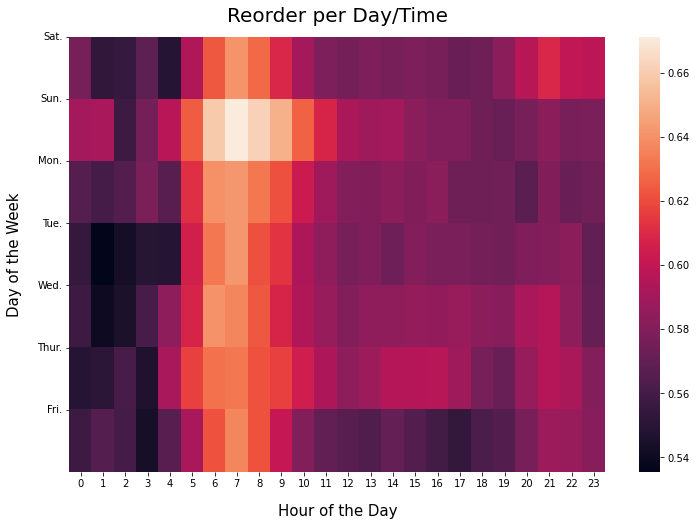

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Reorder per Day/Time', fontsize=20, pad=15)
sns.heatmap(total_reordered)
plt.xlabel('Hour of the Day', fontsize = 15, labelpad=15)
plt.ylabel('Day of the Week', fontsize = 15, labelpad=15)
plt.yticks([0, 1, 2, 3, 4, 5, 6], labels = ['Sat.', 'Sun.', 'Mon.', 'Tue.', 'Wed.', 'Thur.', 'Fri.'], rotation=0)
plt.show();

#### 7. 장바구니 추가와 재주문율 관계

##### 7-0.

In [ ]:
re_add = order_products_df.copy().query('add_to_cart_order<71')
re_add = re_add.groupby('add_to_cart_order')['reordered'].mean().reset_index()
re_add

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598
...,...,...
65,66,0.403361
66,67,0.392941
67,68,0.394737
68,69,0.404130


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


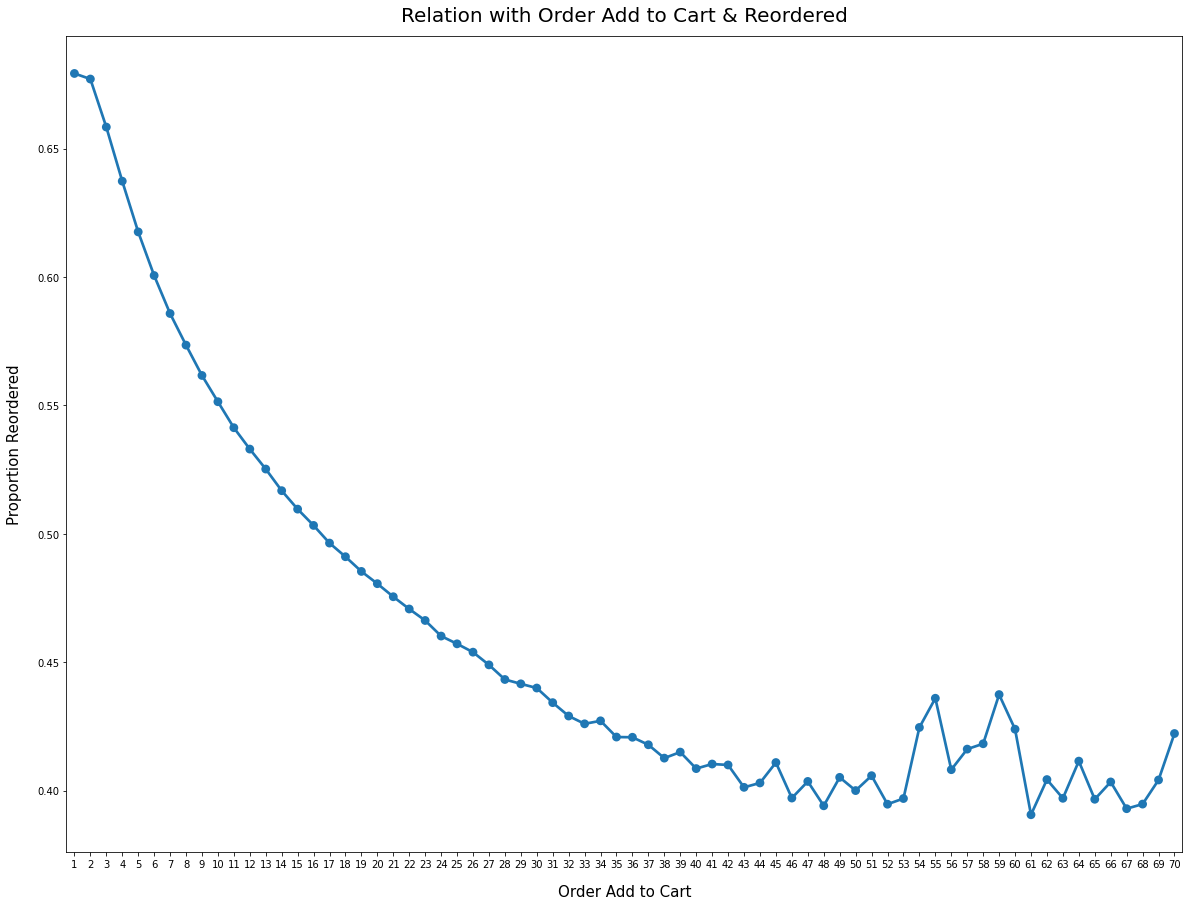

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Relation with Order Add to Cart & Reordered', fontsize=20, pad=15)
sns.pointplot(re_add['add_to_cart_order'], re_add['reordered'], alpha=0.8)
plt.xlabel('Order Add to Cart', fontsize = 15, labelpad=15)
plt.ylabel('Proportion Reordered', fontsize = 15, labelpad=15)
plt.show();

##### 7-1. 그 중 어떤 제품을 제일 처음 장바구니에 넣을까?

In [ ]:
for_total = order_products_df.groupby(['product_id']).count().reset_index().rename(columns={'order_id' : 'total_count'})
first_add = order_products_df.groupby(['product_id', 'add_to_cart_order']).count().query('add_to_cart_order==1').reset_index()
first_add = first_add.join(for_total[['product_id', 'total_count']].set_index('product_id'), on='product_id')
first_add['pct'] = first_add['order_id'] / first_add['total_count']
first_add = first_add.query('total_count>10').sort_values('pct', ascending=False)
first_add = first_add.join(prod_df[['product_id', 'product_name']].set_index('product_id'), on='product_id')
first_add

,product_id,add_to_cart_order,order_id,reordered,total_count,pct,product_name
29838,35133,1,42,42,53,0.792453,Emergency Contraceptive
24031,28335,1,52,52,66,0.787879,Rehab Energy Iced Tea Orangeade
1867,2216,1,14,14,18,0.777778,California Champagne
38485,45328,1,51,51,72,0.708333,"Flavored Vodka, Peach"
12389,14644,1,14,14,20,0.700000,"Cabernet Sauvignon, H3 Collection, Horse Heave..."
...,...,...,...,...,...,...,...
3584,4252,1,1,1,196,0.005102,The Greek Burrito
26727,31505,1,1,1,197,0.005076,Fiesta Grilled Chicken
27566,32500,1,1,1,210,0.004762,Organic Baby Food Garden Vegetables with Turkey
13137,15519,1,1,1,222,0.004505,"Pear, Kiwi, Peas & Spinach Organic Baby Food"


In [ ]:
first_add_top10 = first_add.head(10)
first_add_top10

,product_id,add_to_cart_order,order_id,reordered,total_count,pct,product_name
29838,35133,1,42,42,53,0.792453,Emergency Contraceptive
24031,28335,1,52,52,66,0.787879,Rehab Energy Iced Tea Orangeade
1867,2216,1,14,14,18,0.777778,California Champagne
38485,45328,1,51,51,72,0.708333,"Flavored Vodka, Peach"
12389,14644,1,14,14,20,0.700000,"Cabernet Sauvignon, H3 Collection, Horse Heave..."
16654,19675,1,27,27,39,0.692308,Organic Raspberry Black Tea
12499,14777,1,31,31,45,0.688889,Nasal Decongestant Inhaler with Medicated Vapors
12356,14609,1,24,24,35,0.685714,Soy Powder Infant Formula
13130,15511,1,27,27,40,0.675000,Draft Sake
25642,30225,1,14,14,21,0.666667,For Spit-Up with Iron Infant Formula


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


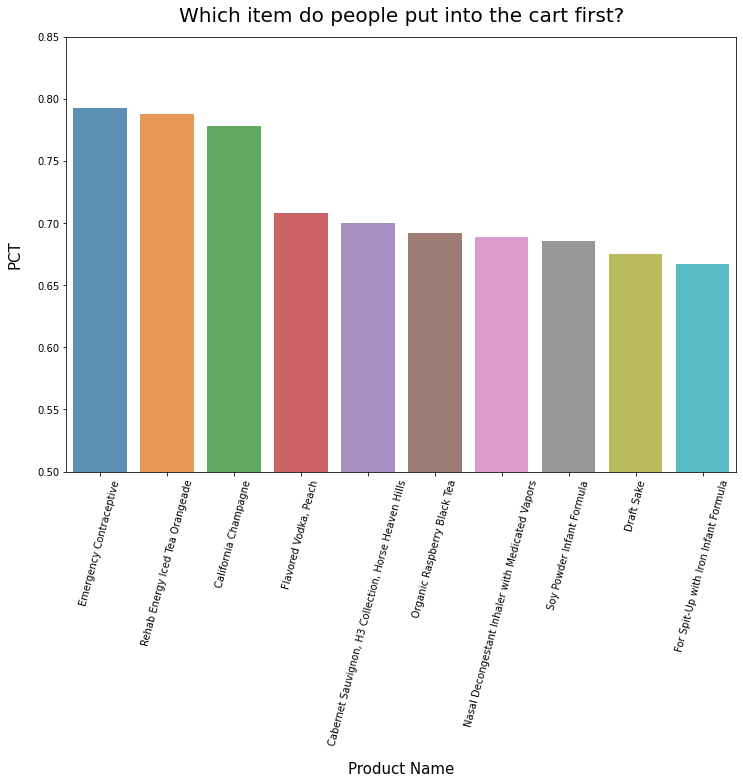

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Which item do people put into the cart first?', fontsize=20, pad=15)
sns.barplot(first_add_top10['product_name'], first_add_top10['pct'], alpha=0.8)
plt.xlabel('Product Name', fontsize = 15, labelpad=15)
plt.ylabel('PCT', fontsize = 15, labelpad=15)
plt.xticks(rotation=75)
plt.ylim([0.5, 0.85])
plt.show();

#### 8. 연관성

##### 8-1. 마지막 주문 날짜와 재주문

In [ ]:
re_last = order_products_df.copy().drop(['product_id', 'add_to_cart_order'], axis=1)
re_last = re_last.join(orders_df[['order_id', 'days_since_prior_order']].set_index('order_id'), on='order_id')
re_last = re_last.groupby('days_since_prior_order')['reordered'].mean().reset_index()
re_last['days_since_prior_order'] = re_last['days_since_prior_order'].astype('int')
re_last.head()

,days_since_prior_order,reordered
0,0,0.741885
1,1,0.617577
2,2,0.644964
3,3,0.668317
4,4,0.677518


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


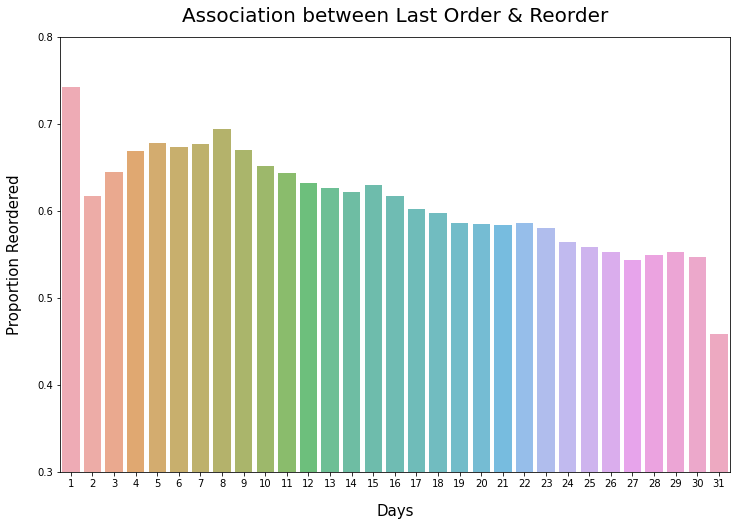

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Association between Last Order & Reorder', fontsize=20, pad=15)
sns.barplot(re_last['days_since_prior_order'], re_last['reordered'], alpha=0.8)
plt.xlabel('Days', fontsize = 15, labelpad=15)
plt.ylabel('Proportion Reordered', fontsize = 15, labelpad=15)
plt.ylim([0.3, 0.8])
plt.xticks(list(range(0, 31)), labels = list(range(1, 32)))
plt.show();

##### 8-2. 주문 수와 재주문

In [ ]:
re_order_1 = order_products_df.copy().groupby('product_id')['reordered'].mean().reset_index().rename(columns={'reordered':'re_per'})
re_order_2 = order_products_df.copy().groupby('product_id').count().reset_index()
re_order = re_order_1.join(re_order_2.set_index('product_id'), on='product_id').drop(['order_id', 'add_to_cart_order'], axis=1).rename(columns={'reordered':'count'})
re_order

,product_id,re_per,count
0,1,0.614627,1928
1,2,0.138298,94
2,3,0.738516,283
3,4,0.458689,351
4,5,0.625000,16
...,...,...,...
49680,49684,0.111111,9
49681,49685,0.122449,49
49682,49686,0.700787,127
49683,49687,0.428571,14


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


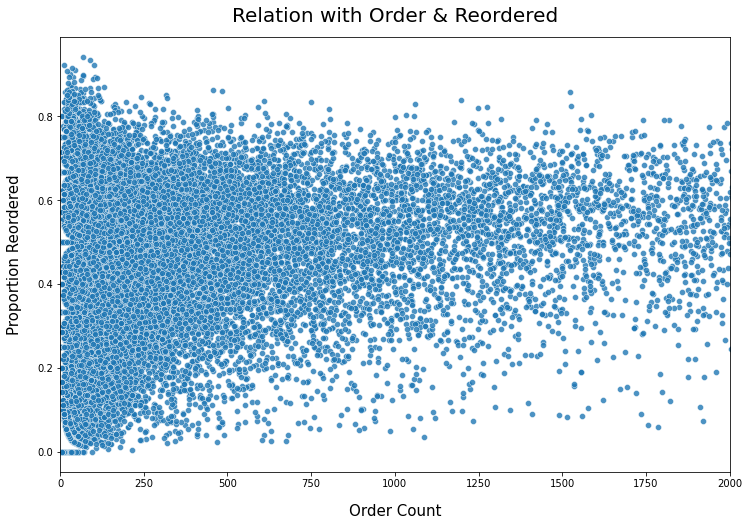

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Relation with Order & Reordered', fontsize=20, pad=15)
sns.scatterplot(re_order['count'], re_order['re_per'], alpha=0.8)
plt.xlabel('Order Count', fontsize = 15, labelpad=15)
plt.ylabel('Proportion Reordered', fontsize = 15, labelpad=15)
plt.xlim([0, 2000])
plt.show();

#### 9. VS

##### 9-1. Organic vs Non-organic

In [ ]:
find_organic = prod_df.copy()

In [ ]:
find_organic['product_name'] = find_organic.product_name.str.lower()

organic_filter = find_organic['product_name'].str.contains('organic')

organic = find_organic[organic_filter].reset_index(drop=True)
non_organic = find_organic[~organic_filter].reset_index(drop=True)

organic['organic'] = True

In [ ]:
total_organic = order_products_df.join(organic[['product_id', 'organic']].set_index('product_id'), on='product_id')
total_organic['organic'] = total_organic.organic.fillna(False)

In [ ]:
final_organic_df = total_organic.groupby('organic')['product_id'].count().reset_index()
final_organic_df.rename(columns={'product_id':'count'}, inplace=True)
final_organic_df

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


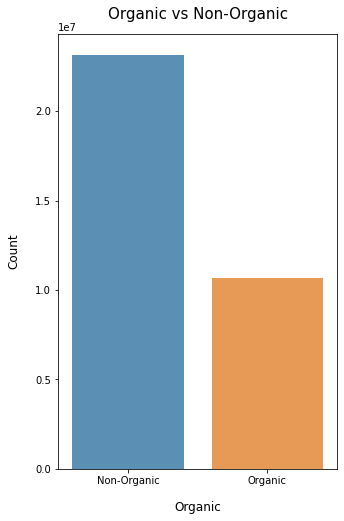

In [ ]:
plt.figure(figsize=(5,8))
plt.title('Organic vs Non-Organic', fontsize=15, pad=15)
sns.barplot(final_organic_df['organic'], final_organic_df['count'], alpha=0.8)
plt.xlabel('Organic', fontsize = 12, labelpad=15)
plt.ylabel('Count', fontsize = 12, labelpad=15)
plt.xticks([False, True], labels=['Non-Organic', 'Organic'])
plt.show();

##### 9-2. Reordering Organic vs Non-organic

In [ ]:
re_organic = total_organic.groupby('organic')['reordered'].mean().reset_index()
re_organic

,organic,reordered
0,False,0.569209
1,True,0.635387


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


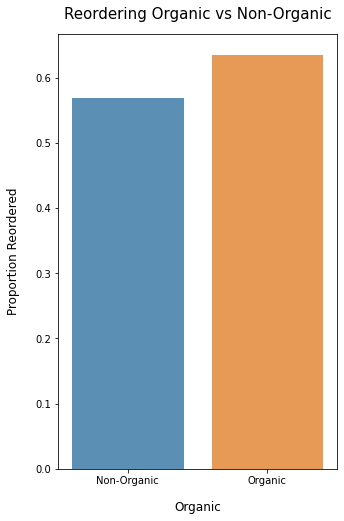

In [ ]:
plt.figure(figsize=(5,8))
plt.title('Reordering Organic vs Non-Organic', fontsize=15, pad=15)
sns.barplot(re_organic['organic'], re_organic['reordered'], alpha=0.8)
plt.xlabel('Organic', fontsize = 12, labelpad=15)
plt.ylabel('Proportion Reordered', fontsize = 12, labelpad=15)
plt.xticks([False, True], labels=['Non-Organic', 'Organic'])
plt.show();

### 인사이트 도출 및 전략
- 자세한 사항은 보고서에

#### 1. 수요 예측 분석 및 주요 특성 파악

#### 2. 주요 상품 및 고객 구매 패턴에 따른 예측 및 추천 

#### 3. 고객 세그맨테이션을 통한 핸들링 전략 제안

### 회고 및 아쉬운 점

- 자세한 사항은 보고서에